<a href="https://colab.research.google.com/github/reeshi-18/Trading-Strategy/blob/main/ModellingOptionPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from scipy import stats
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# **European Options**

## Black Scholes Option Pricing for an European Call Option

**Assumptions of the BSM Model for European Option Pricing**

* No dividends are paid out during the life of the option.

* Markets are random (i.e., market movements cannot be predicted).

* There are no transaction costs in buying the option.

* The risk-free rate and volatility of the underlying asset are known and constant.

* The returns on the underlying asset are log-normally distributed.

* The option is European and can only be exercised at expiration.


**Option Pricing Formula** \
\
$C = S_t*N(d_1) - K*e^{-rT}*N(d_2)$ \

where,

$d_1 = \frac{\ln({\frac{S}{K}}) + (r+ \frac{σ^2}{2})T}{σ\sqrt{T}}$  
$d_2 = \frac{\ln({\frac{S}{K}}) + (r- \frac{σ^2}{2})T}{σ\sqrt{T}} = d_1 - σ\sqrt{T}$ \
\
$N(x) :$ cumulative distribution function  
$S :$ stock price  
$T :$ time to maturity  
$K :$ Strike price  
$r :$ Risk free rate of interest  
$σ :$ Volatility

In [ ]:
def european_bsm_call(S_t, K, r, sigma, T):
    den = 1 / (sigma * np.sqrt(T))
    d1 = den * (np.log(S_t / K) + (r + 0.5 * sigma ** 2) * T)
    d2 = den * (np.log(S_t / K) + (r - 0.5 * sigma ** 2) * T)
    C = S_t * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return C

## Monte Carlo Simulation for European Call Option

Monte Carlo Simulaion is a major numerical approach for pricing derivatives. It is a stochastic process used for derivative valuation and hedging assets. 


$S_{t+1} = S_te^{(\mu - \frac{\sigma^2}{2})Δt + σϵ\sqrt{Δt}}$  
<br>
where,  
$S_t :$ stock price at time $t$  

$ϵ :$ represents a number randomly sampled from a normal distribution with zero mean and standard deviation equals to one.  

$\mu :$ risk free rate of interest

$σ :$ volatility

$Δt :$ number of observations / no. of discrete time intervals
<br />

In [ ]:
def monte_carlo_european(S0,K,r,sigma,T,m,N,plotPath=0):
  dt = T / m
  # Zero array to store values (often faster than appending)
  S = np.zeros((m,N))
  S[0] = S0
  for t in range(1, m):
    # Draw random values to simulate Brownian motion
    Z = np.random.standard_normal(N)
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + (sigma * np.sqrt(dt) * Z))

  if(plotPath):
    return S
  # Sum and discount values
  C = np.exp(-r * T) * np.maximum(S[-1] - K, 0)
  call_value = np.mean(C)

  # 95% confidence levels
  lower_limit = np.mean(C) - 1.96*(np.std(C) / np.sqrt(N))
  upper_limit = np.mean(C) + 1.96*(np.std(C) / np.sqrt(N))

  return call_value,lower_limit,upper_limit

Plotting Paths obtained from Monte Carlo Simulation

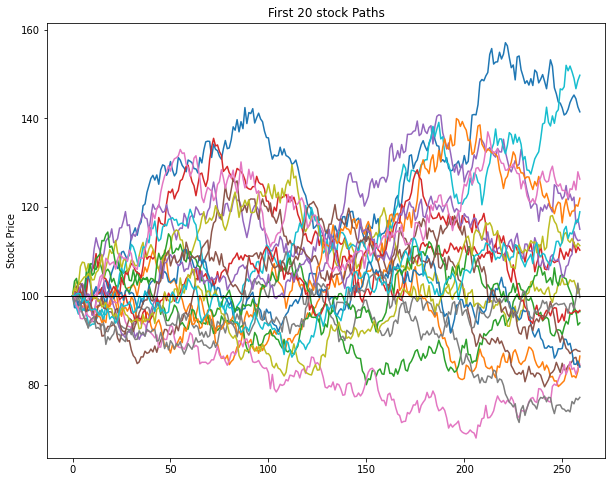

In [ ]:
number_of_simulations = 10000
number_of_observations = 260
current_price = 100
strike_price = 100
time = 1
risk_free_return = 0.07
volatility = 0.25

S = monte_carlo_european(current_price,strike_price,risk_free_return,volatility,time,number_of_observations,number_of_simulations,1)

plt.figure(figsize=(10,8))
plt.title("First 20 stock Paths")
plt.ylabel("Stock Price")
plt.plot(S[:,:20])
plt.axhline(100, lw = 1, color="black")
plt.show()

In [ ]:
## Util function to format and print data in form of table
def printTablesEuropean(volatility,bsm,mc_price,lower_price,upper_price):
  myTable = PrettyTable(["Volatility","BSM Price","MC Option Price","95% lower limit","95% upper limit","Pricing Error(in %)"])

  for i in range(len(volatility)):
    pricing_error = (mc_price[i] - bsm[i])/mc_price[i]
    myTable.add_row([round(volatility[i],2),round(bsm[i],4),round(mc_price[i],4),round(lower_price[i],4),round(upper_price[i],4),round(pricing_error,4)])

  print(myTable)

### Observations

In [ ]:
# Data
number_of_simulations = 1000000
number_of_observations = 260
time = 1
risk_free_return = 0.07
volatility = np.linspace(0.1,0.6,6)

**Out of the money**

+------------+-----------+-----------------+-----------------+-----------------+---------------------+
| Volatility | BSM Price | MC Option Price | 95% lower limit | 95% upper limit | Pricing Error(in %) |
+------------+-----------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |   2.2597  |      2.2454     |      2.2366     |      2.2541     |       -0.0064       |
|    0.2     |   5.7917  |      5.7589     |      5.7379     |      5.7799     |       -0.0057       |
|    0.3     |   9.3798  |      9.373      |      9.3381     |      9.408      |       -0.0007       |
|    0.4     |  12.9598  |     12.9242     |     12.8737     |     12.9747     |       -0.0028       |
|    0.5     |  16.5115  |     16.4332     |     16.3654     |      16.501     |       -0.0048       |
|    0.6     |  20.0227  |     20.0438     |     19.9557     |     20.1319     |        0.0011       |
+------------+-----------+-----------------+-----------------+-----------

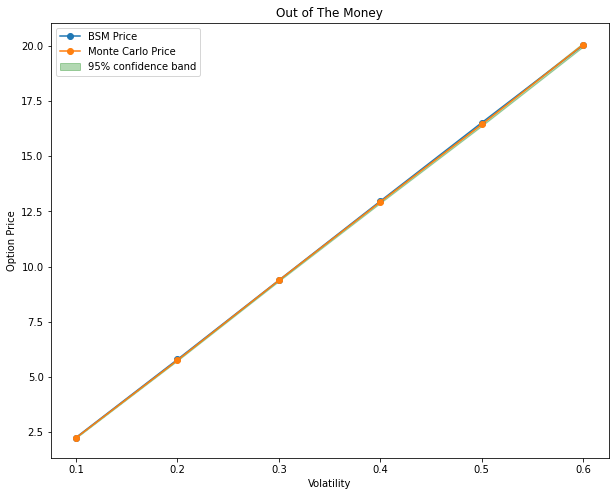

In [ ]:
current_price = 90
strike_price = 100

C_bsm = [european_bsm_call(current_price,strike_price,risk_free_return,vol,time) for vol in volatility]
C_mc = [monte_carlo_european(current_price,strike_price,risk_free_return,vol,time,number_of_observations,number_of_simulations) for vol in volatility]

option_price = [p[0] for p in C_mc]
lower_price = [p[1] for p in C_mc]
upper_price = [p[2] for p in C_mc]

printTablesEuropean(volatility,C_bsm,option_price,lower_price,upper_price)

plt.figure(figsize=(10,8))
plt.title("Out of The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,C_bsm,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.3, color="green")
plt.legend(["BSM Price", "Monte Carlo Price", "95% confidence band"])
plt.show()

**At the money**

+------------+-----------+-----------------+-----------------+-----------------+---------------------+
| Volatility | BSM Price | MC Option Price | 95% lower limit | 95% upper limit | Pricing Error(in %) |
+------------+-----------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |   8.1393  |      8.1046     |      8.0885     |      8.1207     |       -0.0043       |
|    0.2     |  11.5415  |     11.5118     |     11.4819     |     11.5417     |       -0.0026       |
|    0.3     |  15.2105  |     15.1744     |     15.1292     |     15.2196     |       -0.0024       |
|    0.4     |  18.9271  |     18.8206     |     18.7585     |     18.8827     |       -0.0057       |
|    0.5     |  22.6369  |     22.5718     |     22.4903     |     22.6533     |       -0.0029       |
|    0.6     |  26.3157  |     26.3121     |     26.2084     |     26.4158     |       -0.0001       |
+------------+-----------+-----------------+-----------------+-----------

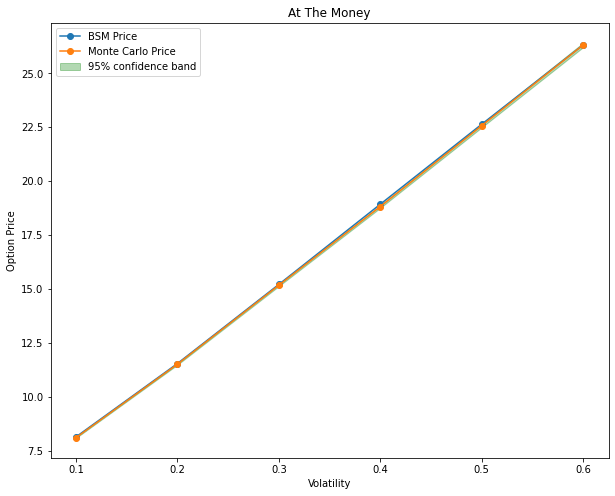

In [ ]:
current_price = 100
strike_price = 100

C_bsm = [european_bsm_call(current_price,strike_price,risk_free_return,vol,time) for vol in volatility]
C_mc = [monte_carlo_european(current_price,strike_price,risk_free_return,vol,time,number_of_observations,number_of_simulations) for vol in volatility]

option_price = [p[0] for p in C_mc]
lower_price = [p[1] for p in C_mc]
upper_price = [p[2] for p in C_mc]

printTablesEuropean(volatility,C_bsm,option_price,lower_price,upper_price)

plt.figure(figsize=(10,8))
plt.title("At The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,C_bsm,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.3, color="green")
plt.legend(["BSM Price", "Monte Carlo Price", "95% confidence band"])
plt.show()

**In the money**

+------------+-----------+-----------------+-----------------+-----------------+---------------------+
| Volatility | BSM Price | MC Option Price | 95% lower limit | 95% upper limit | Pricing Error(in %) |
+------------+-----------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |  16.9679  |     16.9371     |     16.9163     |      16.958     |       -0.0018       |
|    0.2     |  19.0766  |     19.0373     |     18.9994     |     19.0751     |       -0.0021       |
|    0.3     |  22.2729  |     22.2792     |     22.2242     |     22.3343     |        0.0003       |
|    0.4     |  25.8236  |     25.6429     |     25.5692     |     25.7166     |        -0.007       |
|    0.5     |  29.5024  |     29.3693     |     29.2746     |      29.464     |       -0.0045       |
|    0.6     |  33.2191  |     33.2112     |     33.0918     |     33.3305     |       -0.0002       |
+------------+-----------+-----------------+-----------------+-----------

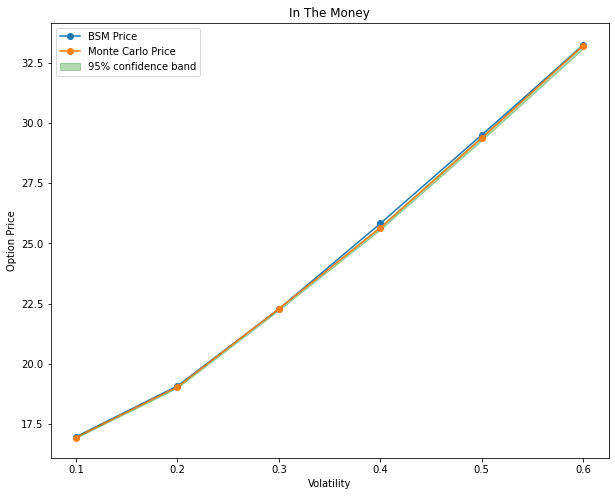

In [ ]:
current_price = 110
strike_price = 100

C_bsm = [european_bsm_call(current_price,strike_price,risk_free_return,vol,time) for vol in volatility]
C_mc = [monte_carlo_european(current_price,strike_price,risk_free_return,vol,time,number_of_observations,number_of_simulations) for vol in volatility]

option_price = [p[0] for p in C_mc]
lower_price = [p[1] for p in C_mc]
upper_price = [p[2] for p in C_mc]

printTablesEuropean(volatility,C_bsm,option_price,lower_price,upper_price)

plt.figure(figsize=(10,8))
plt.title("In The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,C_bsm,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.3, color="green")
plt.legend(["BSM Price", "Monte Carlo Price", "95% confidence band"])
plt.show()

# **Asian** **Options**

### Levy Approximation for Asian Options with constant volatility


Levy Approximation is used for pricing Arithmetic Asian Options

Under the Black-Scholes setting, Levy's approximation method for pricing arithmetic Asian Options can be written as:

$C_{levy} ≃ S_Z*N(d_1) - K_Z*e^{-r*t}*N(d_2) $

where,

$d_1 = \frac{1}{\sqrt{\nu}}*[\frac{ln(L)}{2} - ln(K_z)]$ \
$d_2 = d_1 - \sqrt{\nu}$ \
$S_Z = \frac{S}{(r-D)T}*(e^{-Dt} - e^{-rt})
$ \
$K_Z = K - S_{avg}*\frac{T-t}{T}$ \
$\nu = ln(L) - 2[rt + ln(S_Z)]$ \
$L = \frac{M}{T^2}$ \
$M = \frac{2S^2}{(r-D) + σ^2}[\frac{e^{(2(r-D)+σ^2)t} - 1}{2(r-D)+σ^2} - \frac{e^{(r-D)t}-1}{r-D}]$\
\
where,
$S :$ Spot Price \
$S_{avg} :$ Average Price \
$K :$ Strike Price \
$r :$ Risk-free interest rate \
$D :$ Dividend yield \
$T :$ Time to maturity
$t :$ Time remaining until maturity \
$σ :$ Observed Volatility \
$N(x) :$ Cumulative Probability Distribution from a normal distribution


In [ ]:
# Levy Approximation using constant volatility
def levy_price(S_t,S_avg,K,r,D,T,t,sigma):
  # calculating m
  tmp1 = 2*(S_t ** 2) / (r - D + sigma ** 2)
  tmp2 = (np.exp((2*(r-D) + sigma**2)*t) - 1) / (2*(r-D) + sigma ** 2)
  tmp3 = (np.exp((r-D)*t) - 1) / (r-D)

  m = tmp1 * (tmp2 - tmp3)
  l = m / (T**2)

  # calculating S_z
  S_z = S_t * 1/((r-D)*T) * (np.exp(-D*t) - np.exp(-r*t))
  v = np.log(l) - 2*(r*t + np.log(S_z))
  # calculating K_Z
  K_z = K - S_avg*(T-t)/T

  # calculating d1 and d2
  d1 = (np.log(l)/2 - np.log(K_z)) / np.sqrt(v)
  d2 = d1 - np.sqrt(v)

  # calculating value of call option
  C = S_z * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
  return C

## Monte Carlo Simulation for Asian Options with constant volatility

$S_{t+1} = S_te^{(\mu - \frac{\sigma^2}{2})Δt + σϵ\sqrt{Δt}}$ \
\
95% Confidence Levels can be presented as follows:

$μ - \frac{1.96}{\sqrt{N}} < P < μ + \frac{1.96}{\sqrt{N}}$ \
\
Value of Call Option:
$C = max(S_{avg} - K, 0) * e^{-rT}$

### Aritmetic Asian Options

In [ ]:
def asian_option_mc(s0, k, r, T, sig, m, n):
    # It is an arithmetic solution by using Monte Carlo method
    dt = T / m  # length of time interval
    c = []
    S = np.zeros((m,n))
    S[0] = s0
    for t in range(1, m):
        Z = np.random.standard_normal(n)
        S[t] = S[t-1] * np.exp((r - 0.5 * sig ** 2) * dt + (sig * np.sqrt(dt) * Z))

    avg = np.mean(S,axis=0)
    c = np.maximum((avg - k), 0) * np.exp(-r * T)

    c_value = np.mean(c)
    # 95% confidence level
    lower_limit = np.mean(c) - 1.96*(np.std(c) / np.sqrt(n))
    upper_limit = np.mean(c) + 1.96*(np.std(c) / np.sqrt(n))

    return c_value,lower_limit,upper_limit

In [ ]:
## Util function to format and print data in form of table
def printTables(volatility,levy,option_price,lower_price,upper_price):
  myTable = PrettyTable(["Volatility","Levy Price","MC Option Price","95% Lower Limit","95% Upper Limit","Pricing Error(in %)"])

  for i in range(len(volatility)):
    pricing_error = (option_price[i] - levy[i])/option_price[i]
    myTable.add_row([round(volatility[i],2), round(levy[i],4), round(option_price[i],4), round(lower_price[i],4), round(upper_price[i],4), round(pricing_error,4)])

  print(myTable)

### Observations

In [ ]:
# Data
number_of_simulations = 1000000
number_of_observations = 260
risk_free_return = 0.07
dividend = 0
time = 1
volatility = np.linspace(0.1,0.6,6)

**Options out of the money**

+------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |   0.2917   |      0.2901     |      0.2879     |      0.2924     |       -0.0055       |
|    0.2     |   1.7663   |      1.7684     |      1.7599     |      1.7769     |        0.0012       |
|    0.3     |   3.6313   |      3.6258     |      3.6102     |      3.6415     |       -0.0015       |
|    0.4     |   5.6215   |      5.595      |      5.5715     |      5.6184     |       -0.0047       |
|    0.5     |   7.6733   |      7.588      |      7.5561     |      7.6199     |       -0.0112       |
|    0.6     |   9.7664   |      9.6232     |      9.582      |      9.6644     |       -0.0149       |
+------------+------------+-----------------+-----------------+-

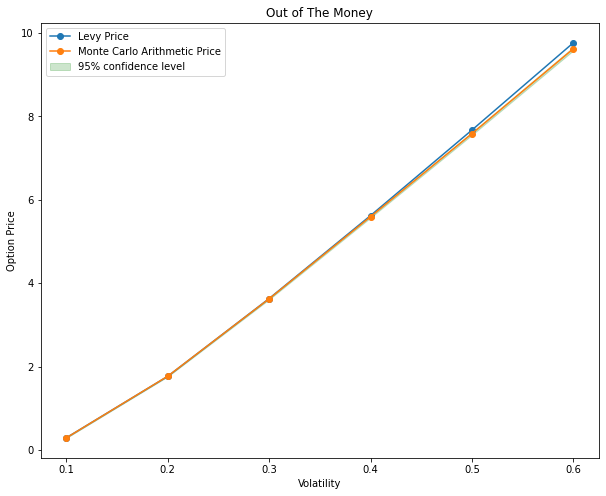

In [ ]:
strike_price = 100
current_price = 90

# Levy Approximation Price
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(current_price,avg_price,strike_price,risk_free_return,dividend,time,time,vol) for vol in volatility]

# Monte Carlo Price
mcap = [asian_option_mc(current_price,strike_price,risk_free_return,time,vol,number_of_observations,number_of_simulations) for vol in volatility]
option_price = [p[0] for p in mcap]
lower_price = [p[1] for p in mcap]
upper_price = [p[2] for p in mcap]

# printing the observations
printTables(volatility,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("Out of The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.2, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()


**Options at the money**

+------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |   4.2669   |      4.2443     |      4.2356     |      4.253      |       -0.0053       |
|    0.2     |   6.2849   |      6.2399     |      6.2238     |      6.2559     |       -0.0072       |
|    0.3     |   8.4351   |      8.3678     |      8.3439     |      8.3917     |        -0.008       |
|    0.4     |  10.6288   |     10.5137     |     10.4812     |     10.5462     |        -0.011       |
|    0.5     |  12.8501   |     12.6506     |     12.6088     |     12.6925     |       -0.0158       |
|    0.6     |  15.0957   |     14.7532     |     14.7013     |     14.8051     |       -0.0232       |
+------------+------------+-----------------+-----------------+-

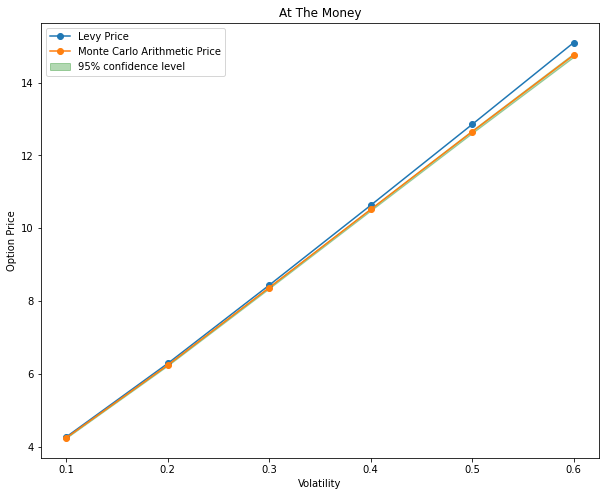

In [ ]:
strike_price = 100
current_price = 100

# Levy Approximation Price
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(current_price,avg_price,strike_price,risk_free_return,dividend,time,time,vol) for vol in volatility]

# Monte Carlo Price
mcap = [asian_option_mc(current_price,strike_price,risk_free_return,time,vol,number_of_observations,number_of_simulations) for vol in volatility]
option_price = [p[0] for p in mcap]
lower_price = [p[1] for p in mcap]
upper_price = [p[2] for p in mcap]

# printing the observations
printTables(volatility,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("At The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.3, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()

**Options in the money**

+------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |  13.0242   |     13.0128     |     13.0008     |     13.0248     |       -0.0009       |
|    0.2     |   13.766   |      13.684     |     13.6618     |     13.7062     |        -0.006       |
|    0.3     |  15.3063   |     15.1845     |     15.1529     |      15.216     |        -0.008       |
|    0.4     |  17.2062   |     16.9902     |     16.9492     |     17.0313     |       -0.0127       |
|    0.5     |  19.2842   |     18.9517     |     18.9003     |      19.003     |       -0.0175       |
|    0.6     |  21.4678   |     21.0193     |     20.9568     |     21.0818     |       -0.0213       |
+------------+------------+-----------------+-----------------+-

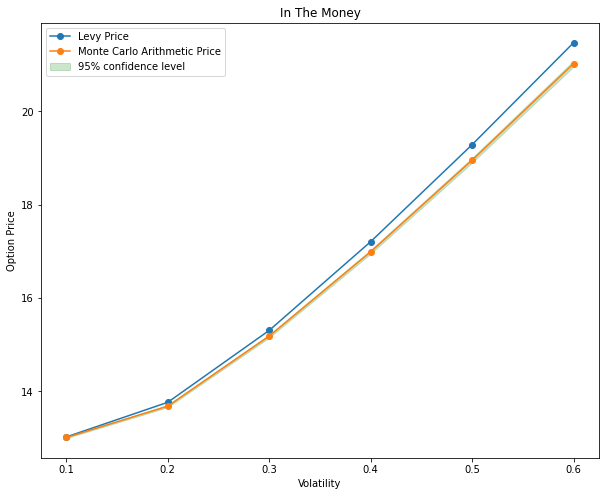

In [ ]:
strike_price = 100
current_price = 110

# Levy Approximation Price
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(current_price,avg_price,strike_price,risk_free_return,dividend,time,time,vol) for vol in volatility]

# Monte Carlo Price
mcap = [asian_option_mc(current_price,strike_price,risk_free_return,time,vol,number_of_observations,number_of_simulations) for vol in volatility]
option_price = [p[0] for p in mcap]
lower_price = [p[1] for p in mcap]
upper_price = [p[2] for p in mcap]

# printing the observations
printTables(volatility,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("In The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.2, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()


## Asian Options with Stochastic Volatility

### Stochastic Volatility Model

Stochastic Volatilities can be calculated as:

$V_t = σ_t^2$ \
$\mu = κ(σ^* - \sigma)$ \
$V_{t+1} = V_te^{(\mu - \frac{ξ^2}{2})Δt + \xiϵ\sqrt{Δt}}$ \
$S_{t+1} = S_te^{(r - \frac{V_t}{2})Δt + \sqrt{V_t}ϵ\sqrt{Δt}}$ \
\
where, \
$\sigma_t :$ Observed Volatility at time $t$ \
$V_t :$ Variance at time $t$ \
$\kappa :$ Mean reverting Rate \
$\sigma^* :$ Long Term Volatility \
$\xi :$ Volatility of instantaneous volatility \
$\mu :$ drift \
$ϵ :$ random number generated from Multivariate Normal distribution with $mean = 0$ and $covariance = ρ$ where $ρ$ is correlation between the 2 Weiner processes (Variance and Stock Paths)

In [ ]:
def monte_carlo_asian_stochastic(S0,K,r,v0,rho,kappa,theta,xi,time,m,N,plotPath=0):
    dt = time / m
    MU  = np.array([0, 0])
    COV = np.matrix([[1, rho], [rho, 1]])

    St = np.zeros((m,N))
    vt2 = np.zeros((m,N))

    St[0] = S0
    vt2[0] = v0*v0

    for t in range(1,m):
      W   = np.random.multivariate_normal(MU, COV, N)
      W_S = W[:,0]
      W_v = W[:,1]
      drift = kappa*(theta - np.sqrt(vt2[t-1]))
      vt2[t] = np.abs(vt2[t-1] * np.exp((drift - 0.5*xi*xi)*dt + xi*np.sqrt(dt)*W_v))
      St[t] = St[t-1]*np.exp((r - 0.5*vt2[t])*dt + np.sqrt(vt2[t]*dt)*W_S)

    vol = np.mean(np.sqrt(vt2),axis=0)

    if(plotPath):
      return np.sqrt(vt2),St

    avg = np.mean(St,axis=0)

    c = np.maximum((avg - K), 0) * np.exp(-r * time)
    c_value = np.mean(c)

    # 95% confidence level
    lower_limit = np.mean(c) - 1.96*(np.std(c) / np.sqrt(N))
    upper_limit = np.mean(c) + 1.96*(np.std(c) / np.sqrt(N))

    mean_vol = np.mean(vol)
    return c_value,lower_limit,upper_limit,mean_vol;

Plotting Paths obtained from Monte Carlo Simulation

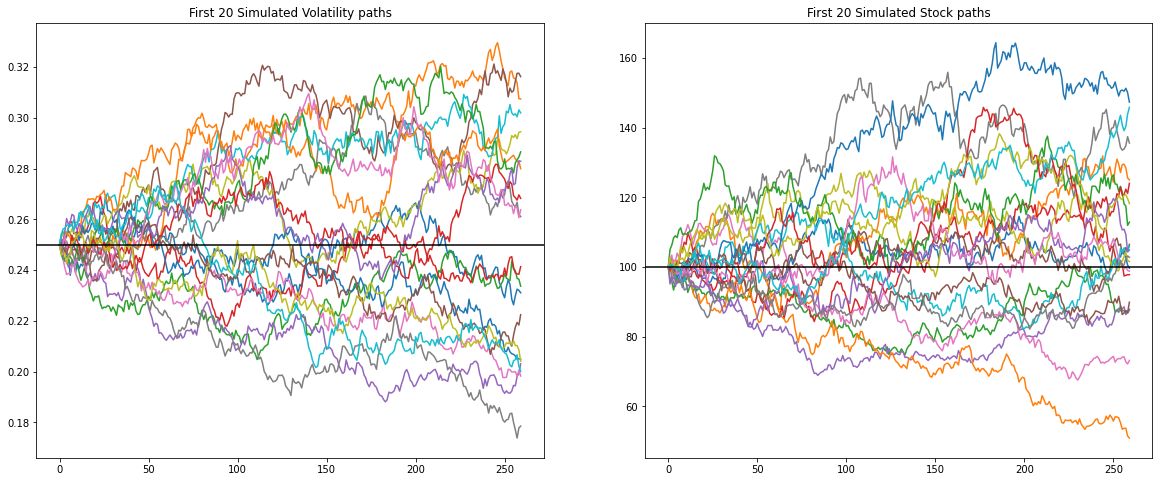

In [ ]:
# Plotting volatility paths
number_of_simulations = 10000
number_of_observations = 260
time                   = 1
expected_return        = 0.07
dividend               = 0
rho   = 0       # Correlation between two weiner process
kappa = 0.1     # Mean Revert rate
theta = 0.15    # Long-term volatility
xi    = 0.3     # Volatility of instantaneous volatility
initial_volatility     = 0.25
current_price = 100
strike_price = 100

vol,S = monte_carlo_asian_stochastic(current_price,strike_price,expected_return,initial_volatility,rho,kappa,theta,xi,time,number_of_observations,number_of_simulations,1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.plot(vol[:,:20])
ax1.set_title("First 20 Simulated Volatility paths")
ax1.axhline(initial_volatility,color="black")
ax2.plot(S[:,:20])
ax2.set_title("First 20 Simulated Stock paths")
ax2.axhline(current_price,color="black")
plt.show()

In [ ]:
## Util function to format and print data in form of table
def printTables(volatility,mean_vol,levy,option_price,lower_price,upper_price):
  myTable = PrettyTable(["Volatility","Mean Volatility","Levy Price","MC Option Price","95% Lower Limit","95% Upper Limit","Pricing Error(in %)"])

  for i in range(len(volatility)):
    pricing_error = (option_price[i] - levy[i])/option_price[i]
    myTable.add_row([round(volatility[i],2), round(mean_vol[i],4), round(levy[i],4), round(option_price[i],4), round(lower_price[i],4), round(upper_price[i],4), round(pricing_error,4)])

  print(myTable)

### Observations

In [ ]:
# Data
number_of_simulations = 100000
number_of_observations = 260
time                   = 1
expected_return        = 0.07
dividend               = 0
rho   = 0       # Correlation between two weiner process
kappa = 0.1     # Mean Revert rate
theta = 0.15    # Long-term volatility
xi    = 0.3     # Volatility of instantaneous volatility
initial_volatility = np.linspace(0.1,0.6,6)     # Initial instantaneous volatility

**Options out of the money**

+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Mean Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |      0.0996     |   0.2877   |      0.3043     |      0.2969     |      0.3117     |        0.0548       |
|    0.2     |      0.1986     |   1.7421   |      1.7393     |      1.7128     |      1.7659     |       -0.0016       |
|    0.3     |      0.2971     |   3.5757   |      3.5927     |      3.5435     |      3.642      |        0.0047       |
|    0.4     |      0.3953     |   5.5257   |      5.5646     |      5.4904     |      5.6388     |        0.007        |
|    0.5     |      0.4929     |   7.5266   |      7.5111     |      7.4103     |      7.6119     |       -0.0021       |
|    0.6     |      0.58

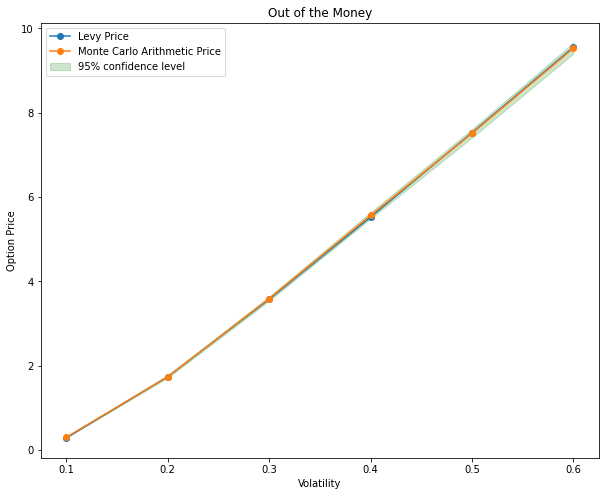

In [ ]:
initial_price          = 90
strike_price           = 100

# Monte Carlo Simulated Price
mcsv = [monte_carlo_asian_stochastic(initial_price,strike_price,expected_return,vol,rho,kappa,theta,xi,time,number_of_observations,number_of_simulations) for vol in initial_volatility]
option_price = [p[0] for p in mcsv]
lower_price = [p[1] for p in mcsv]
upper_price = [p[2] for p in mcsv]
mean_vol = [p[3] for p in mcsv]     # Mean volatility used in levy approximation

# Levy price using mean volatility
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(initial_price,avg_price,strike_price,expected_return,dividend,time,time,vol) for vol in mean_vol]

# printing the observations
printTables(volatility,mean_vol,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("Out of the Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.2, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()

**Options at the money**

+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Mean Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |      0.0996     |   4.2586   |      4.249      |      4.2214     |      4.2766     |       -0.0023       |
|    0.2     |      0.1987     |   6.2577   |      6.2551     |      6.2042     |      6.306      |       -0.0004       |
|    0.3     |      0.2973     |   8.3755   |      8.3131     |      8.2378     |      8.3883     |       -0.0075       |
|    0.4     |      0.3953     |  10.5256   |     10.5218     |     10.4188     |     10.6249     |       -0.0004       |
|    0.5     |      0.4928     |  12.6887   |     12.4619     |     12.3309     |     12.5929     |       -0.0182       |
|    0.6     |      0.59

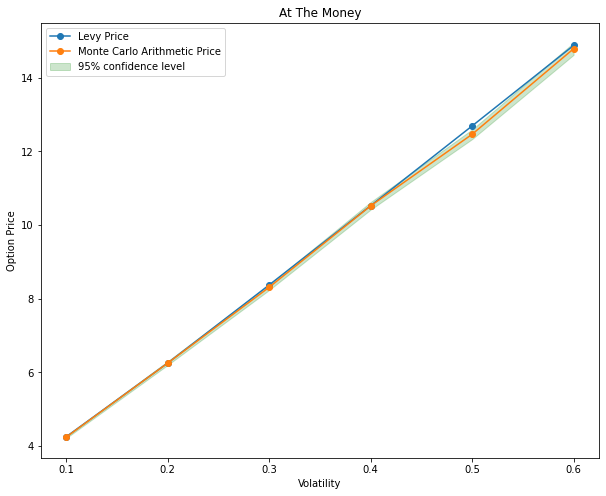

In [ ]:
initial_price          = 100
strike_price           = 100

# Monte Carlo Simulated Price
mcsv = [monte_carlo_asian_stochastic(initial_price,strike_price,expected_return,vol,rho,kappa,theta,xi,time,number_of_observations,number_of_simulations) for vol in initial_volatility]
option_price = [p[0] for p in mcsv]
lower_price = [p[1] for p in mcsv]
upper_price = [p[2] for p in mcsv]
mean_vol = [p[3] for p in mcsv]     # Mean volatility used in levy approximation

# Levy price using mean volatility
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(initial_price,avg_price,strike_price,expected_return,dividend,time,time,vol) for vol in mean_vol]

# printing the observations
printTables(volatility,mean_vol,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("At The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.2, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()

**Options in the money**

+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
| Volatility | Mean Volatility | Levy Price | MC Option Price | 95% Lower Limit | 95% Upper Limit | Pricing Error(in %) |
+------------+-----------------+------------+-----------------+-----------------+-----------------+---------------------+
|    0.1     |      0.0996     |  13.0235   |     12.9953     |     12.9574     |     13.0333     |       -0.0022       |
|    0.2     |      0.1987     |  13.7497   |     13.6687     |     13.5987     |     13.7386     |       -0.0059       |
|    0.3     |      0.2972     |  15.2566   |     15.0781     |     14.9792     |     15.1769     |       -0.0118       |
|    0.4     |      0.3953     |  17.1131   |     16.8323     |     16.7031     |     16.9615     |       -0.0167       |
|    0.5     |      0.493      |   19.134   |     18.9741     |      18.812     |     19.1362     |       -0.0084       |
|    0.6     |       0.5

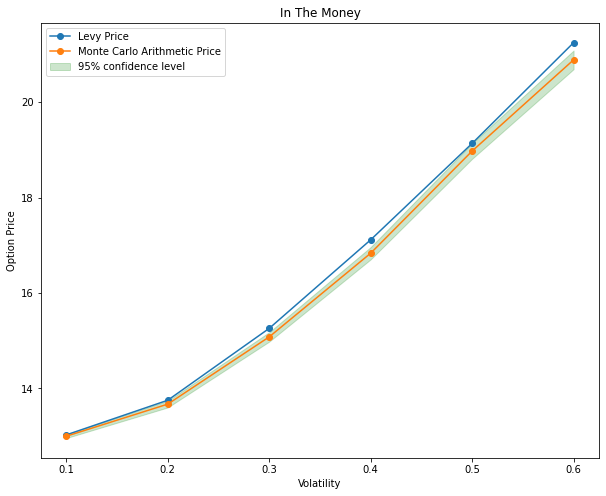

In [ ]:
initial_price          = 110
strike_price           = 100

# Monte Carlo Simulated Price
mcsv = [monte_carlo_asian_stochastic(initial_price,strike_price,expected_return,vol,rho,kappa,theta,xi,time,number_of_observations,number_of_simulations) for vol in initial_volatility]
option_price = [p[0] for p in mcsv]
lower_price = [p[1] for p in mcsv]
upper_price = [p[2] for p in mcsv]
mean_vol = [p[3] for p in mcsv]     # Mean volatility used in levy approximation

# Levy price using mean volatility
# Since time to maturity = time remaining till maturity, average price = current price
avg_price = current_price
lp = [levy_price(initial_price,avg_price,strike_price,expected_return,dividend,time,time,vol) for vol in mean_vol]

# printing the observations
printTables(volatility,mean_vol,lp,option_price,lower_price,upper_price)

# Plot levy price vs monte carlo simulated price
plt.figure(figsize=(10,8))
plt.title("In The Money")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.plot(volatility,lp,marker='o')
plt.plot(volatility,option_price,marker='o')
plt.fill_between(volatility,lower_price,upper_price,alpha = 0.2, color="green")
plt.legend(["Levy Price", "Monte Carlo Arithmetic Price", "95% confidence level"])
plt.show()

## References

1. https://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=4301159&fileOId=4301160
2. http://uu.diva-portal.org/smash/get/diva2:301070/FULLTEXT01.pdf
3. https://macsphere.mcmaster.ca/bitstream/11375/23088/2/Zeng_Jin_201712_MasterofScience.pdf
4. https://www.csie.ntu.edu.tw/~lyuu/theses/thesis_r86052.pdf